In [39]:
import matplotlib.pyplot as plt
from search import SearchModel
import numpy as np
import pandas as pd
import pickle
import numpy as np

In [20]:
model = SearchModel()
#Query from MongoDB
#data = model.get_all()

# This step can use pickle I commited to our git
data = pickle.load(open("all_data.pickle", "rb"))

df = pd.DataFrame(data)
df = df.drop('_id', axis= 1)
df.headd()

,Destination,InboundDate,MinPrice,Origin,OutboundDate
0,ULNA,2018-01-25T00:00:00,98543.0,HELS,2018-01-03T00:00:00
1,BKKT,2018-01-29T00:00:00,35703.0,HELS,2018-01-15T00:00:00
2,BKKT,2018-01-31T00:00:00,49322.0,HELS,2018-01-24T00:00:00
3,SINS,2018-01-25T00:00:00,36104.0,HELS,2018-01-18T00:00:00
4,SINS,2018-01-28T00:00:00,48179.0,HELS,2018-01-14T00:00:00


In [3]:
# Convert Date to Unix epoch time
df["InboundDate"] = pd.to_datetime(df["InboundDate"])
df["InboundDate"] = df["InboundDate"].astype("int64").values.reshape(-1, 1) // 10**9

df["OutboundDate"] = pd.to_datetime(df["OutboundDate"])
df["OutboundDate"] = df["OutboundDate"].astype("int64").values.reshape(-1, 1) // 10**9

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
#Encoding the Destination and Origin
label_encoder = LabelEncoder()
df["Destination"] = label_encoder.fit_transform(df["Destination"])
df["Origin"] = label_encoder.fit_transform(df["Origin"])
# get dummy variable and avoid dummy trap
df = pd.get_dummies(df, columns=["Destination", "Origin"], drop_first=True)

In [6]:
X = df.iloc[:, :].values
X = np.delete(X, 1, 1)
y = df.iloc[:, 1].values

In [21]:
X

array([[  1.51683840e+09,   1.51493760e+09,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.51718400e+09,   1.51597440e+09,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.51735680e+09,   1.51675200e+09,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.51683840e+09,   1.51562880e+09,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.51709760e+09,   1.51476480e+09,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.51606080e+09,   1.51571520e+09,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [22]:
y

array([  98543.,   35703.,   49322., ...,   88748.,  144147.,   16332.])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [43]:
scoring_r2 = "r2"
models = []
results = []
names = []
models.append(('LR', LinearRegression()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('EN', ElasticNet()))
models.append(('RIDGE', Ridge()))
models.append(('RF', RandomForestRegressor()))
models.append(('LASSO', Lasso(alpha=1.0)))

In [44]:
%%time
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_r2)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))    

LR: 0.654610 (0.099609)
CART: 0.085993 (0.138986)
EN: 0.133080 (0.023833)
RIDGE: 0.664846 (0.090176)
RF: 0.355399 (0.060346)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

LASSO: 0.668961 (0.094573)
Wall time: 2min 56s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


**Using Lasso Regression and Ridge Regression give us 66% predict the cheapest price for flight**

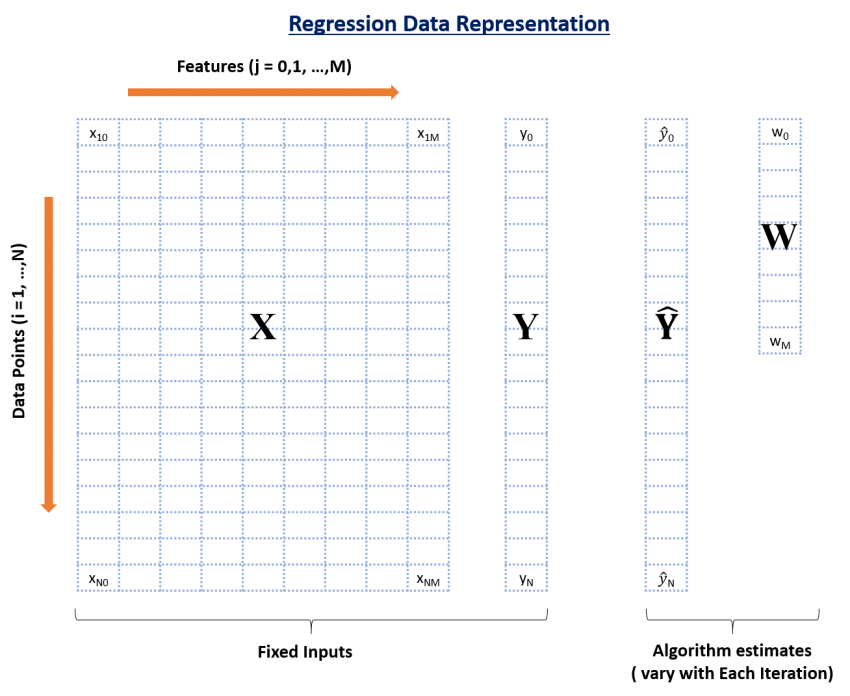

In [28]:
from IPython.display import Image
Image(filename='regression_data_representation.png') 

**Ridge Regression **<br>
The objective function (also called the cost) to be minimized is the RSS(Residual Sum of Squares) plus the sum of square of the magnitude of weights. This can be depicted mathematically as:
$$
Cost(W) = RSS(W) + \lambda * (sum \space of \space squares \space of \space weights) = \\
= \sum_{n=1}^N(y_i - \sum_{j=1}^M w_jx_{ij})^2 + \lambda \sum_{j=0}^Mw_j^2
$$
Where, <br>
X: the matrix of input features (nrow: N, ncol: M+1) <br>
Y: the actual outcome variable (length:N) <br>
N is the total number of data points available <br>
M is the total number of features <br>
W: the weights or the coefficients <br>
L2: $\lambda||w||_2^2 = \lambda \sum_{j=0}^Mw_j^2$ (L2 regularization)

In this case, the gradient would be:
$$
\frac{\partial}{\partial w_j} Cost(W) = -2 \sum_{i=1}^N x_{ij} (y_i - \sum_{k=0}^M w_kx_{ik}) + 2\lambda w_j
$$

**Lasso Regression**

The objective function (also called the cost) to be minimized is the RSS plus the sum of square of the magnitude of weights.

$$
Cost(W) = RSS(W) + \lambda * (sum \space of \space squares \space of \space weights) = \\
= \sum_{n=1}^N(y_i - \sum_{j=1}^M w_jx_{ij})^2 + \lambda \sum_{j=0}^M||w_j||_1
$$
$L1 \space regularization: \lambda||w||_1 = \lambda \sum_{j=0}^M|w_j|$

By increasing the value of the hyperparameter , we increase the regularization strength and shrink the weights of our model. Please note that we don't regularize the intercept term . An alternative approach that can lead to sparse models is the LASSO. Depending on the regularization strength, certain weights can become zero, which makes the LASSO also useful as a supervised feature selection technique: